In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [2]:
df = pd.read_csv('medical_insurance.csv')

In [3]:
df.shape

(100000, 54)

# **CALIDAD DEL DATO**

### Integridad

In [4]:
total_cells = df.shape[0] * df.shape[1]
missing_values = df.isna().sum().sum()

Integridad_KPI = 100 * (1 - missing_values/total_cells)
print(f'KPI Integridad : {Integridad_KPI: .2f}%')

missing_by_col = 100 * df.isna().sum() / df.shape[0]
dict_integridad_col = missing_by_col.to_dict()
for k, v in dict_integridad_col.items():
    if v != 0 : 
        print(k, v)

KPI Integridad :  99.44%
alcohol_freq 30.083


### Consistencia

In [5]:
#Columnas categóricas y numéricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

cat_scores = []
for col in categorical_cols:
    col_lower = col.lower()
    if col_lower == 'sex':
        valid = set(['Female', 'Male', 'Other'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'region':
        valid = set(['North', 'Central', 'West', 'South', 'East'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'urban_rural':
        valid = set(['Suburban', 'Urban', 'Rural'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'education':
        valid = set(['Doctorate', 'No HS', 'HS', 'Some College', 'Masters', 'Bachelors'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'marital_status':
        valid = set(['Married', 'Single', 'Divorced', 'Widowed'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'employment_status':
        valid = set(['Retired', 'Employed', 'Self-employed', 'Unemployed'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'smoker':
        valid = set(['Never', 'Current', 'Former'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'alcohol_freq':
        valid = set(['None', 'Weekly', 'Daily', 'Occasional'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'plan_type':
        valid = set(['PPO', 'POS', 'HMO', 'EPO'])
        score = 100 * df[col].isin(valid).mean()
    elif col_lower == 'network_tier':
        valid = set(['Bronze', 'Gold', 'Platinum', 'Silver'])
        score = 100 * df[col].isin(valid).mean()
    else:
        #Para el resto solo se comprueba que no sea nula
        score = 100 * (1 - df[col].isnull().mean())
    cat_scores.append(score)

num_scores = []
for col in numeric_cols:
    coerced = pd.to_numeric(df[col], errors='coerce')
    score = 100 * (1 - coerced.isnull().mean())
    num_scores.append(score)

if len(categorical_cols) + len(numeric_cols) > 0:
    Consistencia_KPI = (sum(cat_scores) + sum(num_scores)) / (len(cat_scores) + len(num_scores))
else:
    Consistencia_KPI = 100.0

print(f"\nConsistencia (KPI): {Consistencia_KPI:.2f} %")


Consistencia (KPI): 99.44 %


### Validez

Como no conocemos los valores tipicos de la mayoria de nuestras columnas solo vamos a mirar el describe y los min-max que propone y ver si algo nos parece sorprendente.

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
person_id,100000.0,50000.500000,28867.657797,1.00,25000.7500,50000.5000,75000.2500,100000.00
age,100000.0,47.521500,15.988752,0.00,37.0000,48.0000,58.0000,100.00
income,100000.0,49873.905000,46800.214127,1100.00,21100.0000,36200.0000,62200.0000,1061800.00
household_size,100000.0,2.430900,1.075126,1.00,2.0000,2.0000,3.0000,9.00
dependents,100000.0,0.898380,0.950654,0.00,0.0000,1.0000,1.0000,7.00
bmi,100000.0,26.990512,4.994883,12.00,23.6000,27.0000,30.4000,50.40
visits_last_year,100000.0,1.927650,1.737730,0.00,1.0000,2.0000,3.0000,25.00
hospitalizations_last_3yrs,100000.0,0.093640,0.304848,0.00,0.0000,0.0000,0.0000,3.00
days_hospitalized_last_3yrs,100000.0,0.373350,1.373011,0.00,0.0000,0.0000,0.0000,21.00
medication_count,100000.0,1.236320,1.209358,0.00,0.0000,1.0000,2.0000,11.00


### Unicidad

In [7]:
total_rows = df.shape[0]
duplicated_rows = df.duplicated().sum()

Unicidad_KPI = 100* (1- duplicated_rows/total_rows)
print(f'KPI Unicidad : {Unicidad_KPI}%')

KPI Unicidad : 100.0%


### Precision

In [8]:
precision_scores = []


for col in numeric_cols:
    col_mean = df[col].mean()
    col_std = df[col].std()
    lower, upper = col_mean - 3 * col_std, col_mean + 3 * col_std
    in_range = df[col].between(lower, upper, inclusive='both')
    score = 100 * in_range.mean()
    precision_scores.append(score)

if len(precision_scores) > 0:
    Precision_KPI = sum(precision_scores) / len(precision_scores)
else:
    Precision_KPI = 100.0

print(f"\nPrecisión (KPI proxy): {Precision_KPI:.2f} %")


Precisión (KPI proxy): 98.26 %


In [9]:
kpis = {
    'Integridad': Integridad_KPI,
    'Consistencia': Consistencia_KPI,
    'Unicidad': Unicidad_KPI,
    'Precisión': Precision_KPI
}

def kpi_color(value):
    if value < 50:
        return 'red'
    elif value < 80:
        return 'orange'
    else:
        return 'green'

fig = make_subplots(
    rows=1, cols=4,
    specs=[[{'type':'indicator'}]*4]
)

for idx, (name, value) in enumerate(kpis.items()):
    fig.add_trace(go.Indicator(
    mode='gauge+number',
    value=value,
    title={'text': name, 'font': {'size': 16}},
    gauge={
        'axis': {'range':[0,100]},
        'bar': {'color': kpi_color(value)},
        'steps': [
            {'range':[0,50],'color':'lightcoral'},
            {'range':[50,80],'color':'khaki'},
            {'range':[80,100],'color':'lightgreen'}
        ],
    },
    number={'suffix':' %', 'font':{'size':26}, 'valueformat':'.2f'}  # <-- aquí
), row=1, col=idx+1)


fig.update_layout(
    title={'text':'Dashboard de Calidad de Datos','x':0.5,'font':{'size':22}},
    height=300, width=1000, margin=dict(t=80, b=20)
)


fig.show()

### **Analisis exploratoria**

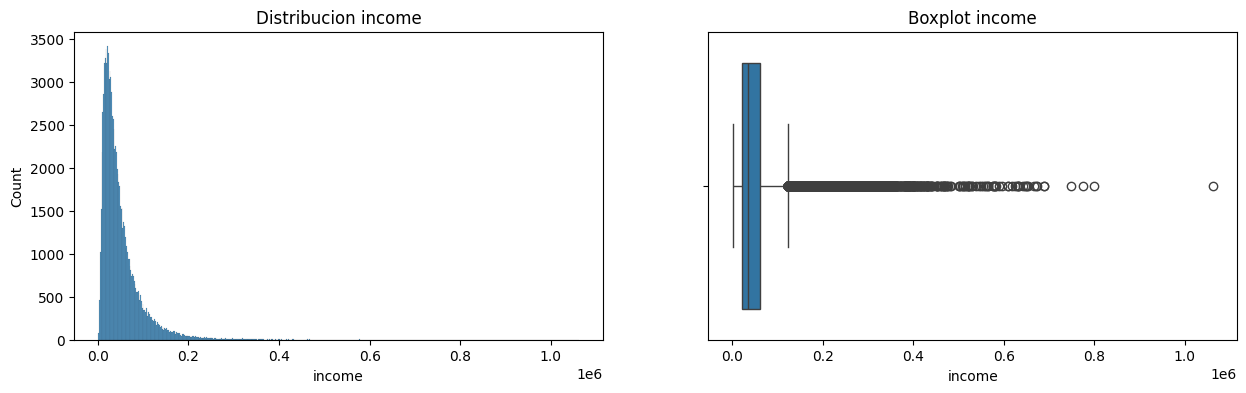

In [10]:
fig, ax = plt.subplots(1,2, figsize=(15,4))
sns.histplot(df['income'], ax=ax[0])
ax[0].set_title("Distribucion income")
sns.boxplot(df['income'], orient='y', ax=ax[1])
ax[1].set_title("Boxplot income")
plt.show()

income (pas de 0) / annual_medical_cost (pas de 0)/ annual_premium (pas de 0) / monthly_premium / avg_claim_amount (Des 0) / total_claims_paid (des 0)

Text(0.5, 1.0, 'Distribucion total claims paid')

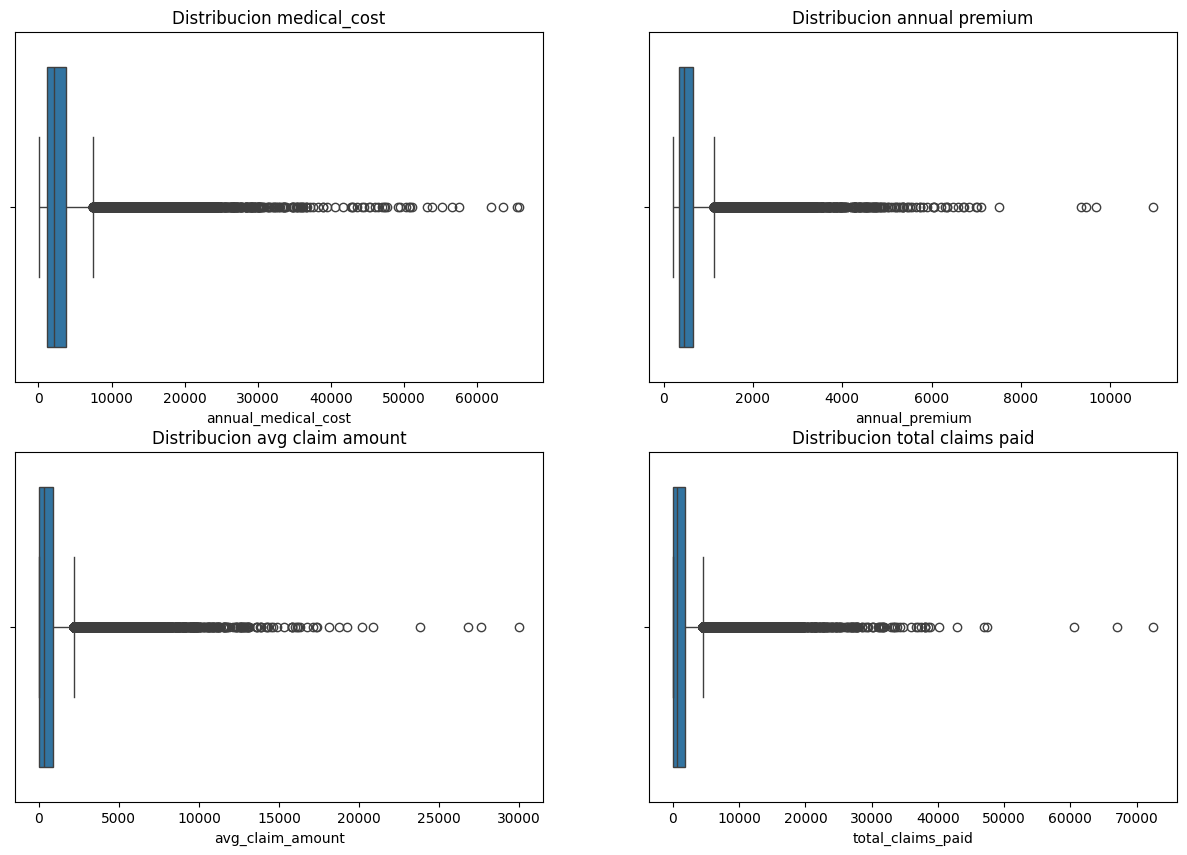

In [11]:
list_money= ["annual_medical_cost","annual_premium", "avg_claim_amount", "total_claims_paid" ]

fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.boxplot(df['annual_medical_cost'], orient='y', ax=ax[0,0])
ax[0,0].set_title("Distribucion medical_cost")

sns.boxplot(df['annual_premium'], orient='y',ax=ax[0,1])
ax[0,1].set_title("Distribucion annual premium")

sns.boxplot(df['avg_claim_amount'],orient='y', ax=ax[1,0])
ax[1,0].set_title("Distribucion avg claim amount")

sns.boxplot(df['total_claims_paid'], orient='y',ax=ax[1,1])
ax[1,1].set_title("Distribucion total claims paid")

Se puede ver que todas las columnas que describen un monto tienen una distribucion sesgada hasta la derecha con outliers potentes. Entonces nos pareceria relevante hacer un log sobre los valores. Tendremos que tener en cuenta que 'avg_claim_amount' y 'total_claims_paid' tienen valores nulas cuando les tratamos.

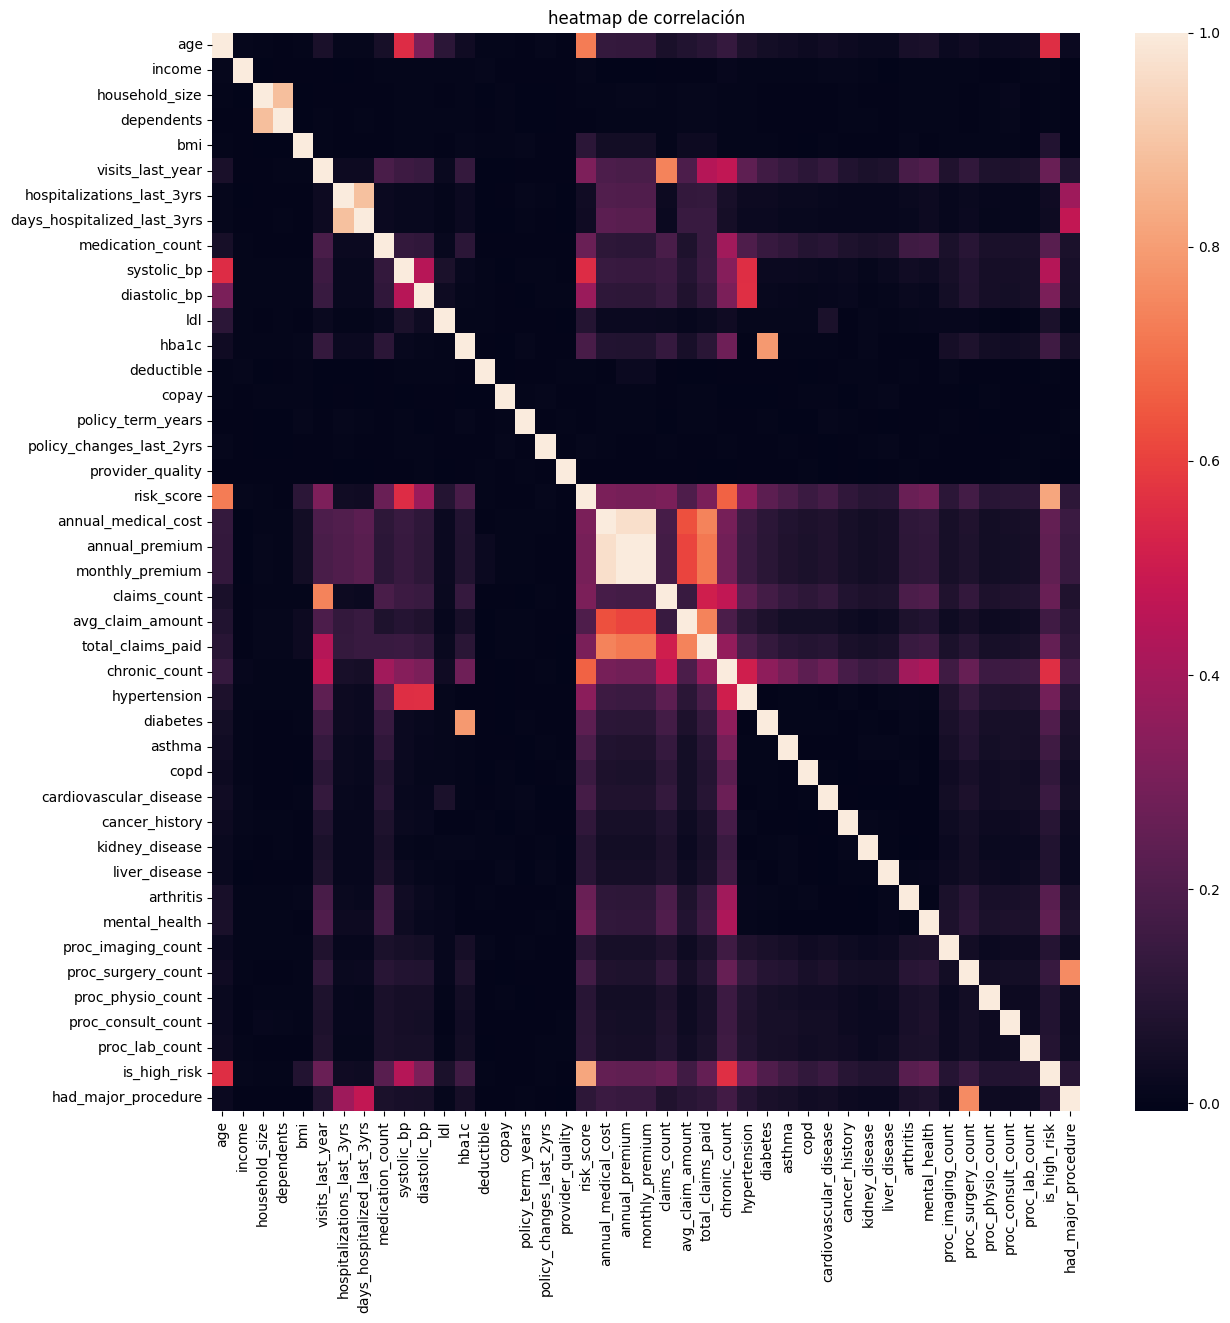

In [12]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols.pop(0)
corr = df[num_cols].corr()
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr, fmt=".2f", ax=ax)
ax.set_title("heatmap de correlación")
plt.show()

Con esa matriz de correlacion podemos ver que no tenemos muchas columnas que son altamente correlacionadas, lo que significa que no tenemos muchas posibilidades de simplemente suprimir algunas columnas.  

<Axes: xlabel='monthly_premium', ylabel='annual_premium'>

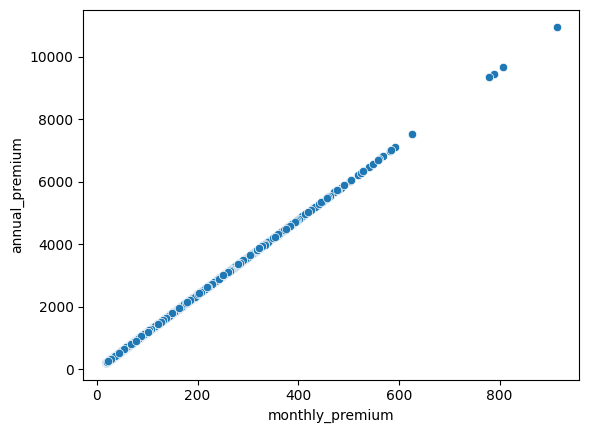

In [13]:
sns.scatterplot(df, x='monthly_premium', y='annual_premium')

Aqui la correlacion perfecta entre monthly premium y annual_premium se confirma sin ningun desviacion.  
Solo eliminaremos el 'monthly_premium' que es exactament 'annual_premium' / 12

<Axes: xlabel='age', ylabel='risk_score'>

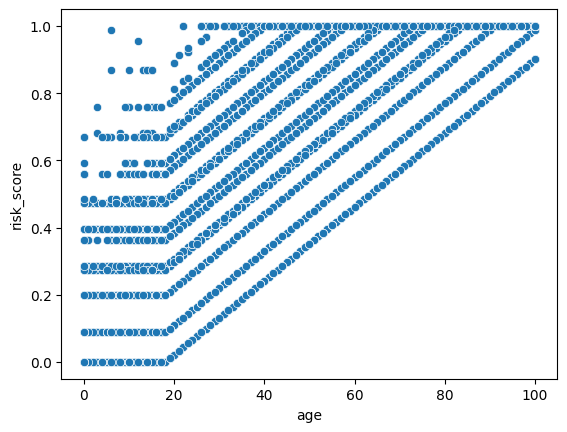

In [14]:
sns.scatterplot(df, x='age', y='risk_score')

# **Tratamiento**

Primeramente suprimimos la columna de monthly_premium ya que tenemos la a nivel anual que nos da la informacion a escala mas comparable y relevante con las otras columnas similares.

In [15]:
df = df.drop(columns='monthly_premium')

### faltantes

Al calcular la Integridad habiamos visto en su detalle que estaba la columna de 'alcohol_freq' a la cual faltaba datos. Vamos a hacer un enfoco sobre esta columna.

In [16]:
vals = df['alcohol_freq'].unique().tolist()
missing_percentage = round(100 * float(df['alcohol_freq'].isna().sum() / df.shape[0]),1)

print(f"{vals} son los valores de la columna")
print(f'Los nan representan {missing_percentage}%  de esas')

[nan, 'Weekly', 'Daily', 'Occasional'] son los valores de la columna
Los nan representan 30.1%  de esas


Como podemos ver no hay una opcion para los que no beben alcohol en absoluto. Asi podemos suponer que los nan no viene de datos faltantes sino que de gente que nunca consuma alcohol. Para confirmar eso necesitariamos la proporcion de no-bebedores en los EEUU.  
Despues de una rapida investigacion, nuestra hipotesis parece justa : https://www.cdc.gov/nchs/products/databriefs/db374.htm ya que se expecte un 30% de no bebedores.  
  
Entonces vamos a asignar un valor de 'Never' a los nan de la columna a fin de que sea mas claro que los datos no son faltantes y tienen sentidos.

In [17]:
df['alcohol_freq'] = df['alcohol_freq'].fillna('Never')
df

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6266,50,Male,West,Urban,127200.0,No HS,Married,Employed,2,...,0,0,0,0,0,1,0,0,0,0
99996,54887,42,Male,East,Suburban,21600.0,HS,Married,Employed,2,...,0,0,0,0,0,0,0,0,0,0
99997,76821,41,Male,West,Rural,81900.0,HS,Divorced,Unemployed,1,...,0,0,0,1,0,1,0,0,0,0
99998,861,51,Female,South,Urban,43400.0,Doctorate,Single,Unemployed,3,...,0,0,1,0,0,2,2,1,0,0


Vamos a cambiar algunas columnas numericas que nos parecen importante para la segmentacion en numéricas ordenales. Asi el algoritmo de PCA podra tomarles en cuenta.

In [18]:
map_education = {'No HS':0, 'HS':1, 'Some College':2, "Bachelors":3, 'Masters':4, 'Doctorate':5}
map_smoker = {'Never' : 0, 'Former' : 2, 'Current' : 4}
map_alcohol = {'Never' : 0, 'Occasional' : 1, 'Weekly' : 2, 'Daily': 3}

df['education'] = df['education'].map(lambda x: map_education[x])
df['smoker'] = df['smoker'].map(lambda x: map_smoker[x])
df['alcohol_freq'] = df['alcohol_freq'].map(lambda x: map_alcohol[x])

### Outliers 

En la parte de exploracion hemos visto que las columnas represantantes de montos de dinero tienen una distribucion con un sesgo a la derecha y un monton de outliers. Como vamos a escalar posterioramente y que para nuestro clustering intentaramos trabajor con K-Means, vamos a aplicar un logaritmo.  
Como tenemos dos de esas columnas que contienen valores de 0, utilizamos el log(x+1) y no el log basico. 

In [19]:
#income (pas de 0) / annual_medical_cost (pas de 0)/ annual_premium (pas de 0) / monthly_premium / avg_claim_amount (Des 0)
df['log_income'] = df['income'].map(lambda x: np.log(x + 1))
df['log_annual_medical_cost'] = df['annual_medical_cost'].map(lambda x: np.log(x + 1))
df['log_annual_premium'] = df['annual_premium'].map(lambda x: np.log(x + 1))
df['log_avg_claim_amount'] = df['avg_claim_amount'].map(lambda x: np.log(x + 1))
df['log_total_claims_paid'] = df['total_claims_paid'].map(lambda x: np.log(x + 1))

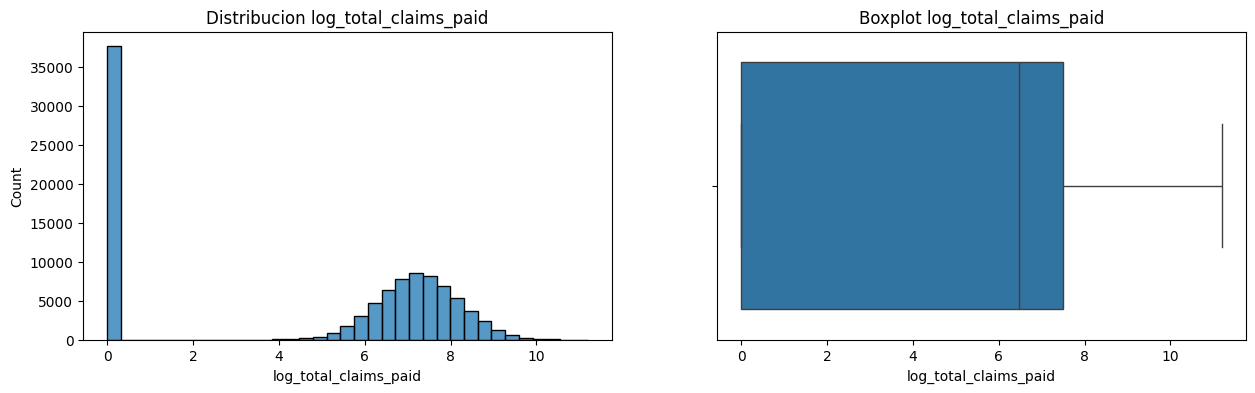

In [20]:
e = 'log_total_claims_paid'
fig, ax = plt.subplots(1,2, figsize=(15,4))
sns.histplot(df[e], ax=ax[0])
ax[0].set_title(f"Distribucion {e}")
sns.boxplot(df[e], orient='y', ax=ax[1])
ax[1].set_title(f"Boxplot {e}")
plt.show()

In [21]:
df = df.drop(columns=['income','annual_medical_cost','annual_premium','avg_claim_amount','total_claims_paid'])

In [22]:
df.columns

Index(['person_id', 'age', 'sex', 'region', 'urban_rural', 'education',
       'marital_status', 'employment_status', 'household_size', 'dependents',
       'bmi', 'smoker', 'alcohol_freq', 'visits_last_year',
       'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs',
       'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c',
       'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years',
       'policy_changes_last_2yrs', 'provider_quality', 'risk_score',
       'claims_count', 'chronic_count', 'hypertension', 'diabetes', 'asthma',
       'copd', 'cardiovascular_disease', 'cancer_history', 'kidney_disease',
       'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count',
       'proc_surgery_count', 'proc_physio_count', 'proc_consult_count',
       'proc_lab_count', 'is_high_risk', 'had_major_procedure', 'log_income',
       'log_annual_medical_cost', 'log_annual_premium', 'log_avg_claim_amount',
       'log_total_claims_paid'],
     

# **CLASIFICACION**

In [60]:
import os
import json
from sklearn.model_selection import (train_test_split, StratifiedKFold, cross_val_score, validation_curve)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score, make_scorer, recall_score, precision_recall_curve, fbeta_score, f1_score, roc_auc_score, precision_score, recall_score, accuracy_score,roc_curve, auc, confusion_matrix, matthews_corrcoef

Vamos a basar nuestra clasificacion sobre el risk_score. Vamos a hacer una clasificacion en 4 categoria :  
 * riesgo bajo (0-0.25)
 * riesgo (0.25-0.5)
 * riesgo fuerte (0.5-0.75)
 * riesgo alto (0.75-1)

De hecho guardar el is_high_risk que es directamente correlado al score (if risk_score > 0.6) no tiene sentido si queremos que aprenda bien. y también suprimimos el risk_score una vez el risk_level creado

In [24]:
def clasificar(x):
    result = None
    if x <= 0.25:
        result = 0
    elif x <=0.5:
        result = 1
    elif x<=0.75:
        result = 2
    elif x <= 1:
        result = 3
    return result

df['risk_level'] = df['risk_score'].map ( lambda x : clasificar(x))

In [25]:
df = df.drop(columns=['is_high_risk', 'risk_score'])

In [26]:
X = df.drop(columns= ['person_id','risk_level'])
y = df['risk_level']

In [27]:
pd.DataFrame(y.value_counts(normalize=True, sort=True))

,proportion
risk_level,
1,0.34731
2,0.30852
3,0.19723
0,0.14694


In [28]:
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

In [29]:
X_trainVal, X_test, y_trainVal, y_test = train_test_split(X, y, test_size=0.2,  stratify=y, random_state=SEED)
X_train, X_val, y_train, y_val = train_test_split(X_trainVal, y_trainVal, test_size=0.25,  stratify=y_trainVal, random_state=SEED)

os.makedirs('archives', exist_ok=True)
split_indexes = {
    'seed' : SEED,
    'train_id': X_train.index.to_list(),
    'valid_id': X_val.index.to_list(),
    'test_id': X_test.index.to_list()
}

with open('archives/split_indices.json', 'w') as f:
    json.dump(split_indexes, f)

print(f"Número de registros:\n- Train: {len(X_train)}\n- Validación: {len(X_val)}\n- Test: {len(X_test)}")

Número de registros:
- Train: 60000
- Validación: 20000
- Test: 20000


## Pipeline

In [52]:
numeric_cols = ['age','education','household_size','dependents','bmi','smoker','alcohol_freq',
 'visits_last_year','hospitalizations_last_3yrs','days_hospitalized_last_3yrs','medication_count','systolic_bp',
 'diastolic_bp','ldl','hba1c','deductible','copay','policy_term_years','policy_changes_last_2yrs','provider_quality',
 'claims_count','chronic_count','proc_imaging_count','proc_surgery_count','proc_physio_count','proc_consult_count',
 'proc_lab_count','log_income','log_annual_medical_cost','log_annual_premium','log_avg_claim_amount','log_total_claims_paid']

categorical_cols = ['sex', 'region', 'urban_rural', 'marital_status', 'employment_status', 'plan_type', 'network_tier']

binary_cols = ['hypertension', 'diabetes', 'asthma', 'copd', 'cardiovascular_disease', 'cancer_history', 'kidney_disease', 'liver_disease',
               'arthritis', 'mental_health','had_major_procedure']


preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols),
    ('passthrough', 'passthrough', binary_cols)
])

final_pipe = Pipeline([
    ('preproc', preprocessor),
    ('clf', LogisticRegression(max_iter=500,random_state=SEED, multi_class='multinomial',solver='lbfgs'))
    ])

final_pipe

,steps,"[('preproc', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [53]:
X_transformed = final_pipe.named_steps['preproc'].fit_transform(X_train)

num_features = numeric_cols
cat_features = final_pipe.named_steps['preproc'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
ohe_features = binary_cols

all_features = np.concatenate([num_features, cat_features, ohe_features])

X_transformed_df = pd.DataFrame(X_transformed, columns=all_features)
X_transformed_df

,age,education,household_size,dependents,bmi,smoker,alcohol_freq,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,...,diabetes,asthma,copd,cardiovascular_disease,cancer_history,kidney_disease,liver_disease,arthritis,mental_health,had_major_procedure
0,0.029656,1.401704,-0.402900,0.106119,0.385355,-0.606212,-1.195223,-1.112248,-0.307888,-0.272072,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.098552,0.578117,-1.334498,-0.947521,0.425275,-0.606212,-1.195223,0.041895,-0.307888,-0.272072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.405726,-1.892645,-1.334498,-0.947521,0.165796,-0.606212,-0.000080,-1.112248,-0.307888,-0.272072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.155013,-0.245470,1.460294,2.213400,-1.630595,-0.606212,-1.195223,0.041895,2.957097,1.176338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.033022,0.578117,0.528697,0.106119,-1.391076,-0.606212,-0.000080,0.041895,2.957097,0.452133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.155013,-1.892645,0.528697,0.106119,0.624873,2.257896,-0.000080,-1.112248,-0.307888,-0.272072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,1.032508,0.578117,-0.402900,-0.947521,-1.391076,-0.606212,-0.000080,0.041895,-0.307888,-0.272072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.907152,1.401704,-0.402900,-0.947521,0.944232,-0.606212,-1.195223,-1.112248,-0.307888,-0.272072,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,0.719117,-0.245470,1.460294,2.213400,0.205716,-0.606212,-0.000080,0.041895,-0.307888,-0.272072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
### Si quieres cargar sin run la random search (toma ~3-5min)
with open("archives/random_best.json", "r") as f:
    best_params = json.load(f)
print(best_params)

{'clf__C': 0.03807158379249393, 'clf__class_weight': 'balanced', 'clf__multi_class': 'multinomial', 'clf__penalty': 'l1', 'clf__solver': 'saga'}


In [66]:
param_dist_full = [
        # L2 penalty (fast; works for all solvers)
    {
        'clf__penalty': ['l2'],
        'clf__solver': ['lbfgs', 'saga'],
        'clf__C': loguniform(1e-3, 1e1),
        'clf__class_weight': [None, 'balanced'],
        'clf__multi_class': ['ovr', 'multinomial']
    },

    # L1 penalty (saga only, but still useful)
    {
        'clf__penalty': ['l1'],
        'clf__solver': ['saga'],
        'clf__C': loguniform(1e-3, 1e1),
        'clf__class_weight': [None, 'balanced'],
        'clf__multi_class': ['ovr', 'multinomial']
    },

    # ElasticNet (saga only; keep but trim search)
    {
        'clf__penalty': ['elasticnet'],
        'clf__solver': ['saga'],
        'clf__C': loguniform(1e-3, 1e1),
        'clf__class_weight': [None, 'balanced'],
        'clf__l1_ratio': np.linspace(0.1, 0.9, 5),  # avoid extreme 0 & 1 (slow)
        'clf__multi_class': ['ovr', 'multinomial']
    }
]

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)
fbeta_scorer = make_scorer(fbeta_score, beta=1, average = 'macro')

search_full = RandomizedSearchCV(
    final_pipe,
    param_distributions=param_dist_full,
    n_iter=60,
    scoring=fbeta_scorer,
    cv=cv,
    n_jobs=-1,
    random_state=SEED,
    verbose=2
)

search_full.fit(X_train, y_train)

#Resultados RandomizedSearch
best_idx = search_full.best_index_
mean_cv = search_full.cv_results_['mean_test_score'][best_idx]
std_cv = search_full.cv_results_['std_test_score'][best_idx]
best_params = search_full.best_params_

with open('archives/random_best.json', 'w') as f :
    json.dump(search_full.best_params_, f)

print("===== RANDOMIZED SEARCH =====")
print("Mejores hiperparámetros:", search_full.best_params_)
print(f"Fbeta CV — media: {mean_cv:.4f}, std: {std_cv:.4f}")

Fitting 3 folds for each of 60 candidates, totalling 180 fits


c:\Users\Roxane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



===== RANDOMIZED SEARCH =====
Mejores hiperparámetros: {'clf__C': np.float64(0.03807158379249393), 'clf__class_weight': 'balanced', 'clf__multi_class': 'multinomial', 'clf__penalty': 'l1', 'clf__solver': 'saga'}
Fbeta CV — media: 0.8615, std: 0.0017


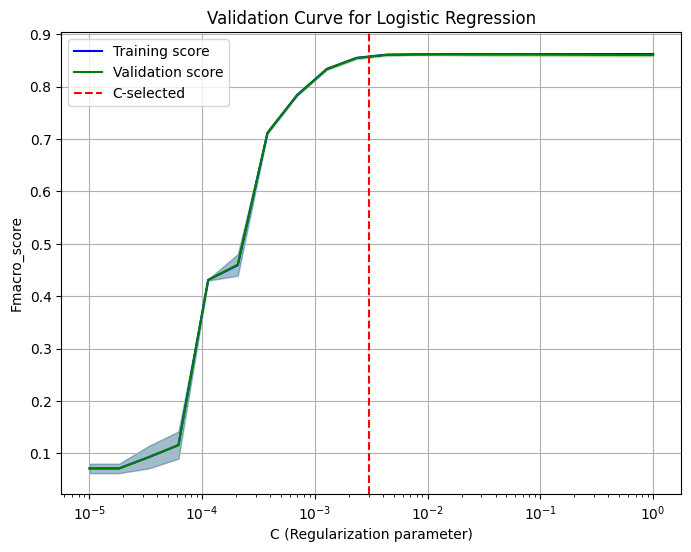

In [69]:
param_range = np.logspace(-5, 0, 20)
# Use the model class from your RandomSearchCV (e.g., SVC)
model = Pipeline([
    ('preproc', preprocessor),  # your preprocessing pipeline
    ('clf', LogisticRegression(max_iter=500, solver='saga', class_weight='balanced', penalty='l1', multi_class='multinomial', random_state=SEED))
])

# Use validation_curve to vary the 'C' parameter of LogisticRegression
train_scores, valid_scores = validation_curve(
    model,
    X_train,
    y_train,
    param_name='clf__C',   # Note the 'clf__C' to access C inside the pipeline
    param_range=param_range,
    cv=5,
    scoring=fbeta_scorer,
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(8,6))
plt.semilogx(param_range, train_mean, label='Training score', color='blue')
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
plt.semilogx(param_range, valid_mean, label='Validation score', color='green')
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, alpha=0.2, color='green')

# Add vertical line for selected C
plt.axvline(x=3e-3, color='red', linestyle='--', label='C-selected')

plt.title('Validation Curve for Logistic Regression')
plt.xlabel('C (Regularization parameter)')
plt.ylabel('Fmacro_score')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


c:\Users\Roxane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



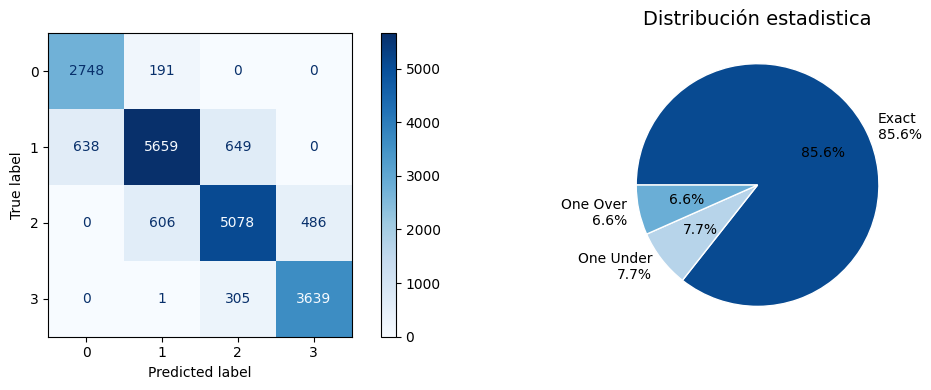

In [90]:
best_model = Pipeline([
    ('preproc', preprocessor),  # your preprocessing pipeline
    ('clf', LogisticRegression(max_iter=500, C=0.03807158379249393 ,solver='saga', class_weight='balanced', penalty='l1', multi_class='multinomial', random_state=SEED))
])
best_model.fit(X_train, y_train)


fig, axes = plt.subplots(1, 2,  figsize=(12,4))

y_pred = best_model.predict(X_test)  
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.named_steps['clf'].classes_)
disp.plot(cmap='Blues', values_format='d', ax=axes[0])


id_true_class = [0,5,10,15]
id_one_under = [4,9,14]
id_one_over = [1,6,11]
id_two_off = [2,3,7,8,12,13]

cm_distrib = cm.ravel().tolist()
total = sum(cm_distrib)
aggregation = [id_true_class, id_one_under, id_one_over, id_two_off]
values = []
for group in aggregation:
    v= 0
    for e in group: 
        v += cm_distrib[e]
    if v > 0.01*total : 
        values.append (v)


labels = ['Exact','One Under' , 'One Over']
percentages = [v / total * 100 for v in values]
colors = plt.cm.Blues([0.9, 0.3, 0.5 ])

labels_with_pct = [f"{lbl}\n{pct:.1f}%" for lbl, pct in zip(labels, percentages)]



axes[1].pie(values,
        labels=labels_with_pct,
        colors=colors,
        autopct='%1.1f%%',
        startangle=180,
        counterclock=False,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})


axes[1].set_title('Distribución estadistica', fontsize=14)

plt.tight_layout()
plt.show()



In [92]:
def bootstrap_metric(y_true, pred, metric_func, B=1000, stratify=None, rng=None):
    rng = np.random.RandomState(SEED) if rng is None else rng
    n = len(y_true)
    vals = []
    if stratify is None:
        for _ in range(B):
            idx = rng.randint(0, n, size=n)
            vals.append(metric_func(y_true[idx], pred[idx]))
    else:
        classes = np.unique(stratify)
        idx_by_c = {c: np.where(stratify==c)[0] for c in classes}
        len_by_c = {c: len(idx_by_c[c]) for c in classes}
        for _ in range(B):
            idx_b = []
            for c in classes:
                idx_c = idx_by_c[c]
                idx_b.append(rng.choice(idx_c, size=len_by_c[c], replace=True))
            idx_b = np.concatenate(idx_b)
            vals.append(metric_func(y_true[idx_b], pred[idx_b]))
    vals = np.array(vals)
    lo, hi = np.percentile(vals, [2.5, 97.5])
    return vals.mean(), vals.std(ddof=1), lo, hi, vals

In [91]:
from functools import partial

In [94]:
fbeta2 = partial(fbeta_score, beta=1, average = 'macro')
fbeta_te = fbeta_score(y_test, y_pred, beta=1, average='macro')
a = y_test.to_numpy()
b = y_pred
mean_b, std_b, lo_b, hi_b, dist_b = bootstrap_metric(a, b, fbeta2, B=800)

print(f'fbetamacro test (punto): {fbeta_te:.4f} — Bootstrap IC95%: [{lo_b:.4f}, {hi_b:.4f}]')

fbetamacro test (punto): 0.8619 — Bootstrap IC95%: [0.8573, 0.8670]


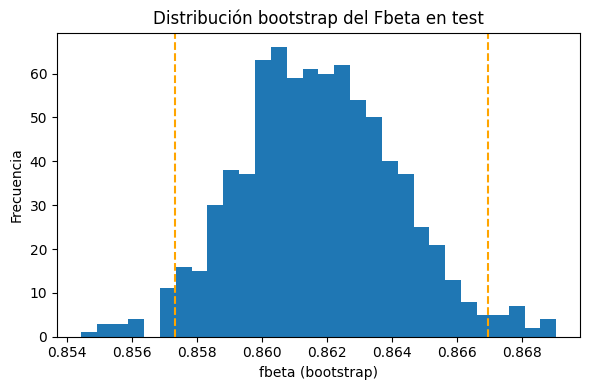

In [95]:
plt.figure(figsize=(6, 4))
plt.hist(dist_b, bins=30)
plt.axvline(lo_b, linestyle='--', color='orange')
plt.axvline(hi_b, linestyle='--', color='orange')
plt.xlabel('fbeta (bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Distribución bootstrap del Fbeta en test')
plt.tight_layout()
plt.show()